In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
epoch = 5

In [27]:
# Define network architecture

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = tf.keras.layers.Flatten(input_shape=(28,28))
    self.d1 = tf.keras.layers.Dense(128, activation='sigmoid')
    self.d2 = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

### 학습 루프 정의

In [28]:
# Implement training loop
@tf.function
def train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)

  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_accuracy(labels, predictions)

### 테스트 루프 정의

In [29]:
# Implement algorithm test
@tf.function
def test_step(model, images, labels, loss_object, test_loss, test_accuracy):
  predictions = model(images)

  t_loss = loss_object(labels, predictions)
  test_loss(t_loss)
  test_accuracy(labels, predictions)

### 데이터셋 가져오고, 정리

In [30]:
# Import and organize dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

### 네트워크 생성

In [31]:
# Create Model
model = MyModel()

### 손실함수, 최적화 알고리즘 정의

In [32]:
# Define loss and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

### 알고리즘 평가지표 설정

In [33]:
# Define performance metrics
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### 알고리즘 학습, 테스트 루프

In [34]:
# Do training loop and test
for epoch in range(epoch):
  for images, labels in train_ds:
    train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy)

  for test_images, test_labels in test_ds:
    test_step(model, test_images, test_labels, loss_object, test_loss, test_accuracy)

  template = 'Epoch {}, Loss : {}, Accuracy : {}, Test Loss : {}, Test Accuracy : {}'
  print(template.format(epoch+1, train_loss.result(), train_accuracy.result() * 100, test_loss.result(), test_accuracy.result() * 100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss : 0.398592084646225, Accuracy : 89.61000061035156, Test Loss : 0.22443018853664398, Test Accuracy : 93.37999725341797
Epoch 2, Loss : 0.2978731095790863, Accuracy : 91.97250366210938, Test Loss : 0.19361978769302368, Test Accuracy : 94.18499755859375
Epoch 3, Loss : 0.2465059459209442, Accuracy : 93.29110717773438, Test Loss : 0.17159345746040344, Test Accuracy : 94.81999969482422
Epoch 4, Loss : 0.21259519457817078, Accuracy : 94.17292022705078, Test Loss : 0.1560392826795578, Test Accura

### 얕은 신경망을 이용한 다중 분류문제

In [35]:
# sigmoid function
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [36]:
# softmax function
def softmax(x):
  e_x = np.exp(x)
  return e_x / np.sum(e_x)

### 네트워크 구조 정의

In [37]:
# Define network architecture
class ShallowNN:
  def __init__(self, num_input, num_hidden, num_output):
    self.W_h = np.zeros((num_hidden, num_input), dtype = np.float32)
    self.b_h = np.zeros((num_hidden,), dtype = np.float32)
    self.W_o = np.zeros((num_output, num_hidden), dtype = np.float32)
    self.b_o = np.zeros((num_output,), dtype = np.float32)

  def __call__(self, x):
    h = sigmoid(np.matmul(self.W_h, x) + self.b_h)
    return softmax(np.matmul(self.W_o, h) + self.b_o)

### 데이터셋 가져오기, 정리하기

In [38]:
dataset = np.load('G:/내 드라이브/fastcampus/Part4) 딥러닝 3 STEP의 기초/dataset/ch2_dataset.npz')
inputs = dataset['inputs']
labels = dataset['labels']

In [39]:
# Create Model
model = ShallowNN(2, 128, 10)

### 사전에 학습된 파라미터 불러오기

In [40]:
weights = np.load('G:/내 드라이브/fastcampus/Part4) 딥러닝 3 STEP의 기초/dataset/ch2_parameters.npz')
model.W_h = weights['W_h']
model.b_h = weights['b_h']
model.W_o = weights['W_o']
model.b_o = weights['b_o']

### 모델 구동 및 결과 프린트

In [18]:
outputs = list()
for pt, label, in zip(inputs, labels):
  output = model(pt)
  # 가장 높은 확률의 인덱스를 추가
  outputs.append(np.argmax(output))
  print(np.argmax(output), label)

outputs = np.stack(outputs, axis=0)

0 0
0 0
2 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
2 0
3 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
6 0
0 0
0 0
0 0
0 0
0 0
6 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
0 0
0 0
0 0
6 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
9 0
0 0
2 0
6 0
0 0
0 0
0 0
0 0
3 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
9 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 1
5 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
5 1
1 1
1 1
2 1
1 1
0 1
1 1
1 1
1 1
1 1
5 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
2 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 2
0 2
0 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
3 2
2 2
2 2
2 2
2 2
3 2
2 2
2 2
2 2
2 2
0 2
1 2
0 2
0 2
2 2
2 2
0 2
2 2
2 2
0 2
0 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 2
2 2
2 2


### 정답 클래스 스캐터 플랏

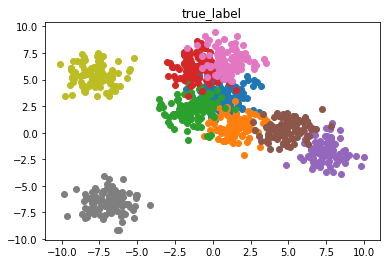

In [47]:
plt.figure()

for idx in range(9):
  mask = labels == idx
  plt.scatter(inputs[mask, 0 ], inputs[mask, 1])

plt.title('true_label')
plt.show()  

### 모델 출력 클래스 스캐터 플랏

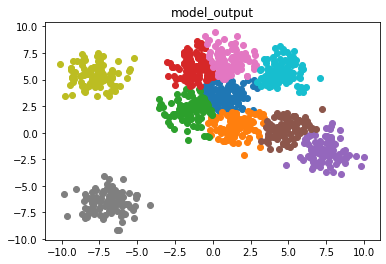

In [48]:
plt.figure()

for idx in range(10):
  mask = outputs == idx
  plt.scatter(inputs[mask, 0 ], inputs[mask, 1])

plt.title('model_output')
plt.show()  

### 경사하강법을 이용한 Shallow
### 하이퍼 파라미터 설정

In [49]:
EPOCHS = 1000

## 네트워크 구조정의

입력계층 : 2, 은닉계층 : 128(Sigmoid activation), 출력계층 : 10(Softmax activation)

In [64]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = tf.keras.layers.Dense(128, input_dim=2, activation='sigmoid')
        self.d2 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, x, training=None, mask=None):
        x = self.d1(x)
        return self.d2(x)

### 학습 루프 정의

In [65]:
@tf.function
def train_step(model, inputs, labels, loss_object, optimizer, train_loss, train_metric):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables) # grad(loss) -----  df(x)/dx 편미분된 값들이 gradients에 들어감

    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss) # loss를 종합
    train_metric(labels, predictions) # 정답과 예측값으로 평가

### 데이터셋 생성, 전처리

In [66]:
np.random.seed(0)

pts = list() # input
labels = list() # output
center_pts = np.random.uniform(-8.0, 8.0, (10, 2))

for idx, center_pt in enumerate(center_pts):
    for _ in range(100):
        pts.append(center_pt + np.random.randn(*center_pt.shape))
        labels.append(idx)

pts = np.stack(pts, axis=0).astype(np.float32)
labels = np.stack(labels, axis=0)

# tensor에서 제공하는 train셋으로 합쳐줌
train_ds = tf.data.Dataset.from_tensor_slices((pts, labels)).shuffle(1000).batch(32)

### 모델 생성

In [67]:
model = MyModel()

### 손실함수 및 최적화 알고리즘 설정
CrossEntropy, Adam Optimizer

In [68]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

### 평가 지표 설정
Accuracy

In [59]:
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

### 학습루프

In [70]:
for epoch in range(EPOCHS):
    for x, label in train_ds:
        train_step(model, x, label, loss_object, optimizer, train_loss, train_accuracy)

    template = "Epoch {}, Loss : {}, Accuracy : {}"
    print(template.format(epoch+1, train_loss.result(), train_accuracy.result() * 100))

Epoch 1, Loss : 0.3133280277252197, Accuracy : 88.50184631347656
Epoch 2, Loss : 0.3132286071777344, Accuracy : 88.50447845458984
Epoch 3, Loss : 0.31311333179473877, Accuracy : 88.5060806274414
Epoch 4, Loss : 0.31298890709877014, Accuracy : 88.50687408447266
Epoch 5, Loss : 0.3128727078437805, Accuracy : 88.50887298583984
Epoch 6, Loss : 0.3127487301826477, Accuracy : 88.51106262207031
Epoch 7, Loss : 0.3126288652420044, Accuracy : 88.51224517822266
Epoch 8, Loss : 0.312512069940567, Accuracy : 88.51441955566406
Epoch 9, Loss : 0.3123905658721924, Accuracy : 88.5165786743164
Epoch 10, Loss : 0.3122721016407013, Accuracy : 88.51893615722656
Epoch 11, Loss : 0.3121832609176636, Accuracy : 88.52069091796875
Epoch 12, Loss : 0.3120670020580292, Accuracy : 88.52262878417969
Epoch 13, Loss : 0.3119523525238037, Accuracy : 88.5245590209961
Epoch 14, Loss : 0.3118830919265747, Accuracy : 88.52688598632812
Epoch 15, Loss : 0.3117695152759552, Accuracy : 88.52899932861328
Epoch 16, Loss : 0.31

### 데이터셋 및 학습 파라미터 저장

In [71]:
np.savez_compressed('ch2_dataset.npz', inputs = pts, labels = labels)

W_h, b_h = model.d1.get_weights()
W_o, b_o = model.d2.get_weights()
W_h = np.transpose(W_h)
W_o = np.transpose(W_o)

np.savez_compressed('ch2_parameters.npz', W_h=W_h, b_h=b_h, W_o=W_o, b_o=b_o)

## Deep Learing_Pet_Classification

In [40]:
import os, random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import xml.etree.ElementTree as et

In [68]:
main_path = 'E:/fastcampus'
image_path = os.path.join(main_path, 'images')
bbox_path = os.path.join(main_path, 'annotations', 'xmls')
seg_path = os.path.join(main_path, 'annotations', 'trimaps')

In [69]:
image_files = [fname for fname in os.listdir(image_path) if fname.endswith('.jpg')]
print(len(image_files))

7390


In [70]:
bbox_files = [fname for fname in os.listdir(bbox_path) if fname.endswith('.xml')]
print(len(bbox_files))

3686


In [71]:
seg_files = [fname for fname in os.listdir(seg_path) if fname.endswith('.png')]
print(len(seg_files))

14780


In [72]:
image_files[:10]

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg']

In [73]:
bbox_files[:10]

['Abyssinian_1.xml',
 'Abyssinian_10.xml',
 'Abyssinian_100.xml',
 'Abyssinian_101.xml',
 'Abyssinian_102.xml',
 'Abyssinian_103.xml',
 'Abyssinian_105.xml',
 'Abyssinian_106.xml',
 'Abyssinian_107.xml',
 'Abyssinian_108.xml']

In [74]:
seg_files[:10]

['._Abyssinian_1.png',
 '._Abyssinian_10.png',
 '._Abyssinian_100.png',
 '._Abyssinian_101.png',
 '._Abyssinian_102.png',
 '._Abyssinian_103.png',
 '._Abyssinian_104.png',
 '._Abyssinian_105.png',
 '._Abyssinian_106.png',
 '._Abyssinian_107.png']

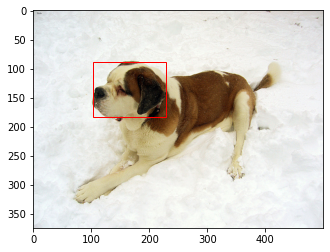

In [121]:
rnd_idx = random.randint(1, len(image_files))
fname = image_files[rnd_idx]
fpath = os.path.join(image_path, fname)
image = Image.open(fpath)
image = np.array(image)

bbox_name = os.path.splitext(fname)[0]+'.xml'
bbox_dir = os.path.join(bbox_path, bbox_name)
tree = et.parse(bbox_dir)

width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax-xmin
rect_h = ymax-ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

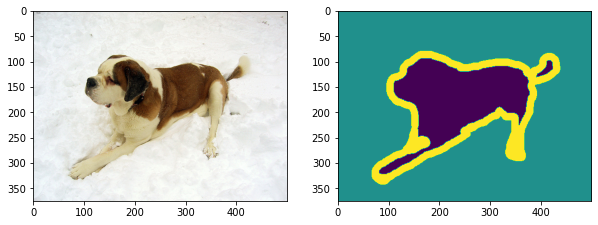

In [122]:
sname = os.path.splitext(fname)[0]+'.png'
spath = os.path.join(seg_path, sname)
seg = Image.open(spath)
seg = np.array(seg)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg)
plt.show()